# Measuring the Josephson Current, the gap voltage and the normal state resistance at 1198ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/1198_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,8.361,63.9885,0.00323
1,8.205,62.5239,0.00316
2,8.008,60.8846,0.00308
3,7.803,59.2317,0.00300
4,7.612,57.8265,0.00293


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [8.361, 8.205, 8.008, 7.803, 7.612, 7.386, 7.203, 7.005, 6.857, 6.673, 6.454, 6.313, 6.122, 5.932, 5.741, 5.6, 5.43, 5.24, 5.077, 4.879, 4.724, 4.54, 4.385, 4.216, 4.046, 3.884, 3.707, 3.538, 3.354, 2.987, 2.973, 2.987, 2.973, 2.945, 2.945, 2.945, 2.938, 2.902, 2.916, 2.902, 2.888, 2.874, 2.888, 2.881, 2.874, 2.874, 2.86, 2.803, 0.106, 0.113, 0.106, 0.106, 0.106, 0.113, 0.134, 0.092, 0.099, 0.12, -2.683, -2.683, -2.712, -2.726, -2.733, -2.733, -2.74, -2.754, -2.768, -2.782, -3.206, -3.354, -3.545, -3.707, -3.884, -4.067, -4.265, -4.406, -4.597, -4.788, -4.943, -5.169, -5.31, -5.522, -5.713, -5.917, -6.101, -6.285, -6.503, -6.722, -6.927, -7.125, -7.351, -7.549, -7.789, -7.972, -7.831, -7.471, -7.153, -6.772, -6.461, -6.157, -5.854, -5.55, -5.261, -4.978, -4.675, -4.378, -4.089, -3.841, -3.559, -3.22, -2.839, -2.825, -2.81, -2.796, -2.768, -2.782, -2.754, -2.74, -2.726, -2.726, -2.697, 0.049, 0.028, 0.035, 0.049, 0.035, 0.035, 0.812, 2.853, 2.874, 2.874, 2.888, 2.916, 2.916, 3.404,

In [5]:
lower_limit = V.index(0.049) + 5
upper_limit = V.index(5.621)

print(lower_limit)
print(upper_limit)

126
142


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.035 0.812 2.853 2.874 2.874 2.888 2.916 2.916 3.404 3.693 3.976 4.216
 4.548 4.773 5.084 5.331]
I =  [ 9.1063 10.7401 12.6925 14.6735 16.6921 18.5926 20.7708 22.8562 25.003
 27.0714 29.0388 31.3677 33.4968 35.7929 38.0018 40.24  ]


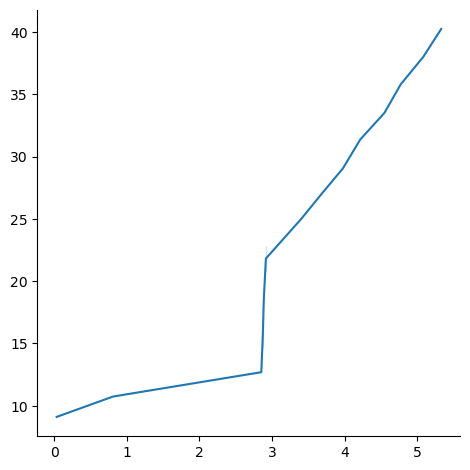

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

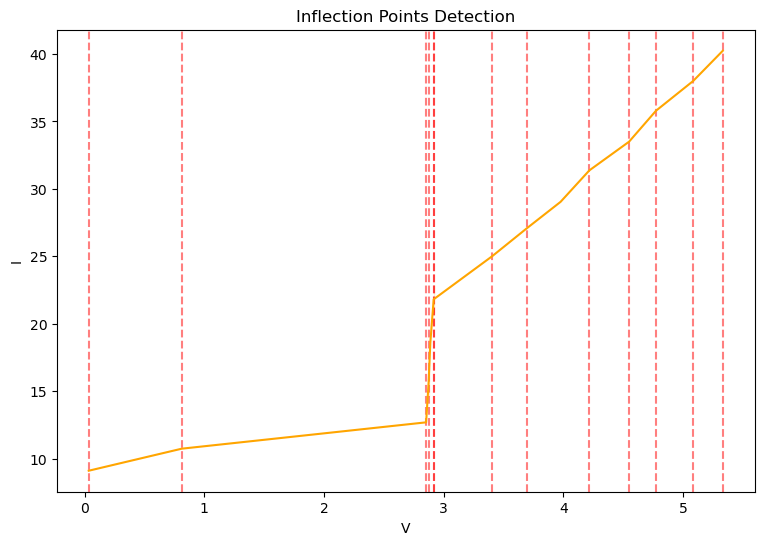

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

### Clear the graph above to focus on Ic and Vc

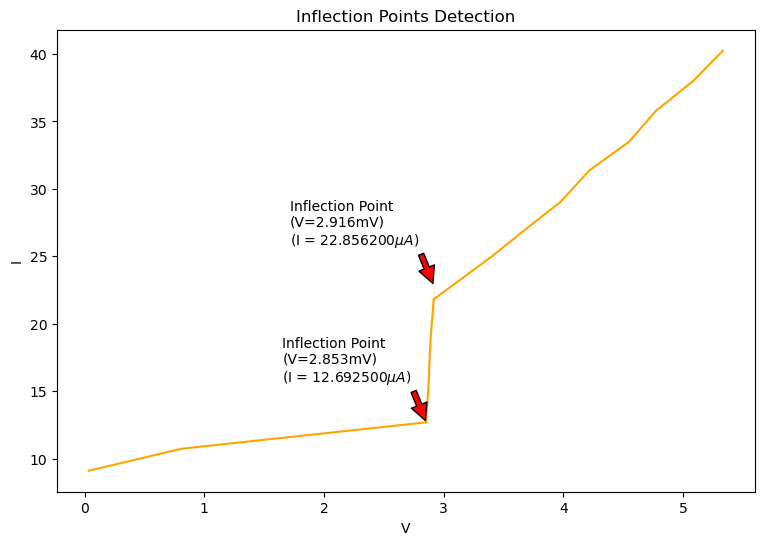

In [9]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [2, 5]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [10]:
#Preview the main dataset
print(list(df[0]))

[8.361, 8.205, 8.008, 7.803, 7.612, 7.386, 7.203, 7.005, 6.857, 6.673, 6.454, 6.313, 6.122, 5.932, 5.741, 5.6, 5.43, 5.24, 5.077, 4.879, 4.724, 4.54, 4.385, 4.216, 4.046, 3.884, 3.707, 3.538, 3.354, 2.987, 2.973, 2.987, 2.973, 2.945, 2.945, 2.945, 2.938, 2.902, 2.916, 2.902, 2.888, 2.874, 2.888, 2.881, 2.874, 2.874, 2.86, 2.803, 0.106, 0.113, 0.106, 0.106, 0.106, 0.113, 0.134, 0.092, 0.099, 0.12, -2.683, -2.683, -2.712, -2.726, -2.733, -2.733, -2.74, -2.754, -2.768, -2.782, -3.206, -3.354, -3.545, -3.707, -3.884, -4.067, -4.265, -4.406, -4.597, -4.788, -4.943, -5.169, -5.31, -5.522, -5.713, -5.917, -6.101, -6.285, -6.503, -6.722, -6.927, -7.125, -7.351, -7.549, -7.789, -7.972, -7.831, -7.471, -7.153, -6.772, -6.461, -6.157, -5.854, -5.55, -5.261, -4.978, -4.675, -4.378, -4.089, -3.841, -3.559, -3.22, -2.839, -2.825, -2.81, -2.796, -2.768, -2.782, -2.754, -2.74, -2.726, -2.726, -2.697, 0.049, 0.028, 0.035, 0.049, 0.035, 0.035, 0.812, 2.853, 2.874, 2.874, 2.888, 2.916, 2.916, 3.404, 3.69

In [11]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence

print(find_last_occurrence(2.916, list(df[0]))) #the second change point above
print(list(df[0]).index(df[0][len(df[0]) - 1]))

133
151


In [12]:
#Select data from the first pass
V_n = np.array(df[0][133:151])
I_n = np.array(df[1][133:151])

#Preview the data
print(V_n)
print(I_n)

[2.916 3.404 3.693 3.976 4.216 4.548 4.773 5.084 5.331 5.621 5.917 6.193
 6.489 6.786 7.097 7.372 7.654 7.965]
[22.8562 25.003  27.0714 29.0388 31.3677 33.4968 35.7929 38.0018 40.24
 42.7075 44.7144 47.3681 49.4501 51.7503 54.2294 56.4723 59.1867 61.5102]


## Define the model and fit the data

In [13]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.01877))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 18
    # variables        = 2
    chi-square         = 16.0028027
    reduced chi-square = 1.00017517
    Akaike info crit   = 1.88305816
    Bayesian info crit = 3.66380168
    R-squared          = 1.00000000
[[Variables]]
    slope:      7763.08388 +/- 116.512678 (1.50%) (init = 7912.954)
    intercept: -1089122.84 +/- 562734.534 (51.67%) (init = -1855655)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9580


## Plot the model

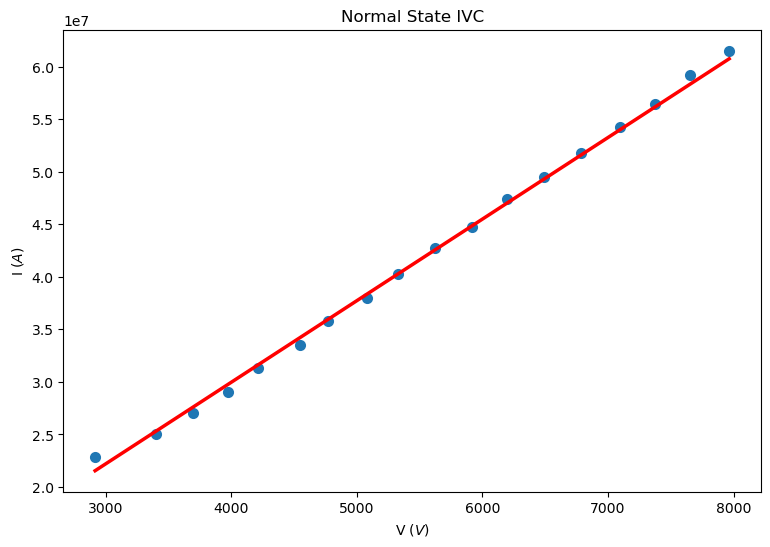

In [14]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [15]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 7763.08388312343, 'intercept': -1089122.8413458439}

In [16]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000129 Ohm


In [17]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 4.68893173 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 4.68893173 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.7526519802285093e-22 J
Gap Energy = 5.505303960457019e-22 J
Gap Voltage = 3.436090351052939 mV
Josephson Current = 20.36202938477948 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.1604728492662704e-22 J
Gap Energy =  4.320945698532541e-22 J
Gap Voltage = 2.696882847667295 mV
Josephson Current = 15.314583924832743 uA
________________________________
________________________________
________________________________


In [18]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[6], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[2], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 22.8562, 'Ic_weak': 20.362, 'Ic_strong': 15.3146, 'V_gap': 2.853, 'Vg_weak': 3.4361, 'Vg_strong': 2.6969, 'Temp': 4.6889}


## Export the results to a csv file

In [19]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>